In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
colombiaTrain = pd.read_csv('properties_colombia_train.csv')
colombiaTest = pd.read_csv('properties_colombia_test.csv')

In [133]:
colombiaTrain['clasificacion']=np.where(colombiaTrain.price>=colombiaTrain.price.mean(), 1, 0)

In [134]:
colombiaTrain.clasificacion.value_counts()

0    151191
1     46358
Name: clasificacion, dtype: int64

In [135]:
#Se borran las filas que tienen no tienen valor o tienen valor 0 en la columna price,
#ya que quedan como apartamentos baratos pero en realidad no lo sabemos 
#y puede complicar el resultado de predicción

colombiaTrain.drop(colombiaTrain[colombiaTrain.price == 0].index,inplace=True)
colombiaTrain.drop(colombiaTrain[colombiaTrain.price.isnull()==True].index,inplace=True)

In [109]:
#Se borran las filas con moneda expresadas en USD, 
#a que la mayoría de los datos están expresado en COP, 
#y se puede llegar a entender que son baratas y puede que no sea así.
#Además la cantidad es ínfima con respecto a todo el dataset
#colombiaTrain.drop(colombiaTrain[colombiaTrain.currency == 'USD'].index, inplace=True)



In [139]:
#Se encuentra que segun sus coordenadas hay filas que se encuentran fuera de Colombia
#Si bien las coordenadas están mal, todos los demás datos circunscriben a Colombia
#Por lo que
print(colombiaTrain[colombiaTrain.lat==colombiaTrain.lat.max()])
print(colombiaTrain[colombiaTrain.lat==colombiaTrain.lat.min()])

        Unnamed: 0                        id    ad_type  start_date  \
138682      172722  0xtrMhsbAsQiEv9XHGWTIQ==  Propiedad  2020-09-29   

          end_date  created_on        lat       lon        l1            l2  \
138682  2021-07-26  2020-09-29 -32.787342 -71.20732  Colombia  Cundinamarca   

        ... surface_covered         price currency price_period  \
138682  ...             NaN  2.000000e+09      COP          NaN   

                                      title  \
138682  51548 LA  CALERA  MIRADO DEL LAGO     

                                              description  property_type  \
138682  Casa hermosa,amplia, vigilancia sector&nbsp; t...           Casa   

        operation_type                      geometry  clasificacion  
138682           Venta  POINT (-71.20732 -32.787342)              1  

[1 rows x 28 columns]


In [124]:
colombiaTest[colombiaTest.lon==colombiaTest.lon.max()]

Unnamed: 0                        id    ad_type  start_date  \
22199      299846  ENUdvFTQidGDoXXzYsIFHw==  Propiedad  2020-10-03   

         end_date  created_on       lat        lon        l1       l2  ...  \
22199  2020-11-30  2020-10-03  3.870204 -67.924336  Colombia  Guainía  ...   

      bathrooms surface_total surface_covered currency  price_period  \
22199       NaN           NaN             NaN      COP           NaN   

                                   title  \
22199  SE VENDE FINCA EN INIRIDA GUAINIA   

                                             description  property_type  \
22199  Finca de 14,56 hectáreas en venta en la zona r...           Lote   

       operation_type                       geometry  
22199           Venta  POINT (-67.9243361 3.8702044)  

[1 rows x 26 columns]

In [127]:
print(colombiaTrain.reset_index())

         index  Unnamed: 0                        id    ad_type  start_date  \
0            0      861131  CScTjaFiP6yCzS8tFX0ZVA==  Propiedad  2020-12-14   
1            1      200972  DlCxox9+FuugkxS2kBVfJg==  Propiedad  2020-09-16   
2            2      554622  yitN1AigL45gh/K2YSF8rw==  Propiedad  2020-08-19   
3            3      540321  hELQ9njwODbLMpATXieRdQ==  Propiedad  2020-11-23   
4            4      448920  aBCtKT7LDzt2CxJQ+gVFEA==  Propiedad  2020-10-06   
...        ...         ...                       ...        ...         ...   
197469  197544      444298  u2M1W+AwbEZlRdmphDOuZg==  Propiedad  2020-10-27   
197470  197545      976934  m0P17AlA6Sp+uvJTI3x3AA==  Propiedad  2020-11-27   
197471  197546      508286  nSRnmPZIwE92m/FQv8ktVQ==  Propiedad  2020-10-28   
197472  197547      546633  cbYIZxxFHsXvvkixg5+DBQ==  Propiedad  2020-08-14   
197473  197548      448114  ivrCGYtvreFxwv/BHSLWTg==  Propiedad  2020-10-06   

          end_date  created_on        lat        lo

In [65]:
colombiaTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197482 entries, 0 to 197548
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197482 non-null  int64  
 1   id               197482 non-null  object 
 2   ad_type          197482 non-null  object 
 3   start_date       197482 non-null  object 
 4   end_date         197482 non-null  object 
 5   created_on       197482 non-null  object 
 6   lat              147996 non-null  float64
 7   lon              147996 non-null  float64
 8   l1               197482 non-null  object 
 9   l2               197482 non-null  object 
 10  l3               186455 non-null  object 
 11  l4               45334 non-null   object 
 12  l5               27383 non-null   object 
 13  l6               6850 non-null    object 
 14  rooms            27498 non-null   float64
 15  bedrooms         40474 non-null   float64
 16  bathrooms        156417 non-null  floa

In [130]:

colombiaTest.operation_type.unique()

array(['Venta'], dtype=object)

In [75]:
colombiaTrain.price.describe()

count    1.974820e+05
mean     6.436181e+08
std      1.944885e+09
min      7.500000e+05
25%      2.000000e+08
50%      3.300000e+08
75%      6.000000e+08
max      3.450000e+11
Name: price, dtype: float64

In [83]:
colombia_cat = colombiaTrain.select_dtypes(include=['object'])
colombia_num = colombiaTrain.select_dtypes(include=['float64','int64','int32'])

In [84]:
colombia_num[:].corr()

Unnamed: 0       lat       lon     rooms  bedrooms  \
Unnamed: 0         1.000000  0.088677  0.007497  0.005615  0.007674   
lat                0.088677  1.000000  0.348825 -0.089900 -0.087846   
lon                0.007497  0.348825  1.000000 -0.091153 -0.058126   
rooms              0.005615 -0.089900 -0.091153  1.000000  0.999128   
bedrooms           0.007674 -0.087846 -0.058126  0.999128  1.000000   
bathrooms          0.006649 -0.078675 -0.031741  0.663139  0.578494   
surface_total     -0.001714 -0.015002  0.008482  0.086157  0.071037   
surface_covered   -0.009328 -0.002081 -0.005963  0.050558  0.045474   
price             -0.007456 -0.004829  0.032939  0.178329  0.121968   
clasificacion      0.008013 -0.021410  0.039575  0.247266  0.186627   

                 bathrooms  surface_total  surface_covered     price  \
Unnamed: 0        0.006649      -0.001714        -0.009328 -0.007456   
lat              -0.078675      -0.015002        -0.002081 -0.004829   
lon              -0.031741       0.008482        -0.005963  0.032939   
rooms             0.663139       0.086157         0.050558  0.178329   
bedrooms          0.578494       0.071037         0.045474  0.121968   
bathrooms         1.000000       0.105937         0.053440  0.443495   
surface_total     0.105937       1.000000         0.706779  0.414640   
surface_covered   0.053440       0.706779         1.000000  0.206906   
price             0.443495       0.414640         0.206906  1.000000   
clasificacion     0.539736       0.154229         0.025356  0.330629   

                 clasificacion  
Unnamed: 0            0.008013  
lat                  -0.021410  
lon                   0.039575  
rooms                 0.247266  
bedrooms              0.186627  
bathrooms             0.539736  
surface_total         0.154229  
surface_covered       0.025356  
price                 0.330629  
clasificacion         1.000000

In [104]:
(colombiaTest.currency.isnull() == True).value_counts()

False    65833
True        17
Name: currency, dtype: int64

In [ ]:
#Se borra la columna 

In [108]:
colombiaTrain[colombiaTrain.currency=='USD']

Unnamed: 0                        id    ad_type  start_date  \
5902        968218  rbp33S2gwQMUm4uL9uiESg==  Propiedad  2020-08-25   
49196          110  qw+l3GewCFgQ4KH0pxStUA==  Propiedad  2020-10-07   
56159       874575  4p1clkPJ5acEDb9cY38Umg==  Propiedad  2020-10-26   
56522       874396  yu6EN/r21XB3FDkuEVqL+A==  Propiedad  2020-10-26   
116979       51666  EwDsJaQoCbpejoXGZReUjw==  Propiedad  2020-09-13   
136236      200614  scSKyD9kllWlPnoFwbwOKw==  Propiedad  2020-09-16   
137025      630538  U1bChe1aBazSg0SKUDfWXA==  Propiedad  2020-08-29   
167143      102295  w7sVBDzBykDl7sgZmAQoXw==  Propiedad  2020-08-08   

          end_date  created_on        lat        lon        l1  \
5902    9999-12-31  2020-08-25   4.914310 -73.993189  Colombia   
49196   2021-01-22  2020-10-07  10.513831 -75.498685  Colombia   
56159   2020-10-26  2020-10-26   4.739003 -74.098302  Colombia   
56522   2020-10-26  2020-10-26   4.695757 -74.043894  Colombia   
116979  2021-01-12  2020-09-13        NaN        NaN  Colombia   
136236  2020-10-29  2020-09-16   4.622794 -74.090960  Colombia   
137025  9999-12-31  2020-08-29  12.585979 -81.714549  Colombia   
167143  9999-12-31  2020-08-08  10.829302 -75.160260  Colombia   

                                             l2  ... surface_covered  \
5902                               Cundinamarca  ...             NaN   
49196                                   Bolívar  ...             NaN   
56159                              Cundinamarca  ...             NaN   
56522                              Cundinamarca  ...             NaN   
116979                                Santander  ...             NaN   
136236                             Cundinamarca  ...             NaN   
137025  San Andrés Providencia y Santa Catalina  ...             NaN   
167143                                Atlántico  ...             NaN   

             price currency price_period  \
5902      750000.0      USD          NaN   
49196    1960000.0      USD          NaN   
56159     850000.0      USD      Mensual   
56522    1017000.0      USD      Mensual   
116979   1143711.0      USD          NaN   
136236  65999999.0      USD          NaN   
137025   3000000.0      USD          NaN   
167143   9750000.0      USD          NaN   

                                                    title  \
5902       Vendo espectacular casa entre Bogota y Briceño   
49196   Exclusive beach house for sale - Manzanillo de...   
56159       Casa en Venta Costa del Este RAH PA: 20-11172   
56522   Apartamento en Venta Santa Maria RAH PA: 20-10683   
116979                                Villa for sale Bali   
136236                               Venta Casa Excelente   
137025           HOTEL EN VENTA EN LA ISLA DE SAN ANDRÉS    
167143           Lote en venta Vía Barranquilla Cartagena   

                                              description  property_type  \
5902    Espectacular casa entre Bogota- Briceño km 12 ...           Casa   
49196   ¡EXCLUSIVE BEACH HOUSE FOR SALE - MANZANILLO D...           Casa   
56159   Viva en una casa espaciosa con terrazas y pati...           Casa   
56522   Majestuoso apartamento a estrenar con la mejor...    Apartamento   
116979  Villa for sale Bali<br />\n<br />\nLocation: J...          Finca   
136236  <br />\n - Calefacción\n- Parrilla\n <br />\n ...           Casa   
137025  \nUn Hotel Boutique TOTALMENTE frente al mar.\...           Otro   
167143  OPORTUNIDAD DE INVERSIÒN EN EL CARIBE COLOMBIA...           Lote   

        operation_type                              geometry  clasificacion  
5902             Venta         POINT (-73.9931885 4.9143096)              0  
49196            Venta  POINT (-75.4986852407 10.5138313669)              0  
56159            Venta          POINT (-74.098302 4.7390028)              0  
56522            Venta         POINT (-74.0438943 4.6957568)              0  
116979           Venta                           POINT EMPTY              0  
136236           Venta  

In [191]:
colombiaTrain.info()
#colombiaTrain.l3.info()
#colombiaTrain.operation_type.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197482 entries, 0 to 197548
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197482 non-null  int64  
 1   id               197482 non-null  object 
 2   ad_type          197482 non-null  object 
 3   start_date       197482 non-null  object 
 4   end_date         197482 non-null  object 
 5   created_on       197482 non-null  object 
 6   lat              147996 non-null  float64
 7   lon              147996 non-null  float64
 8   l1               197482 non-null  object 
 9   l2               197482 non-null  object 
 10  l3               186455 non-null  object 
 11  l4               45334 non-null   object 
 12  l5               27383 non-null   object 
 13  l6               6850 non-null    object 
 14  rooms            27498 non-null   float64
 15  bedrooms         40474 non-null   float64
 16  bathrooms        156417 non-null  floa

In [ ]:
#Se borran las columnas operation_type, ad_type y l1 ya que contienen una sola etiqueta por lo que la columna target no depende de estas.

In [ ]:
#Se borra la columna geometry porque otorga el mismo valor que las columnas lat y lon


In [141]:
(colombiaTest.bathrooms == 0).value_counts()

False    65850
Name: bathrooms, dtype: int64

In [186]:
len(colombiaTest.l6.unique())

122

In [ ]:
#Se decide no trabajar con las columnas title y descripción, 
#ya que no se tienen los conocimientos suficientes para aplicar PLN de manera exitosa, 
#además esto complejizaría el modelo y se opta por uno más simple



In [ ]:
#Se eliminan las columnas price_period, surface_covered, surface_total, bedrooms, rooms, l4,l5, l6, lat y long por falta de datos

#Se borra la columna created_on ya que contiene la misma información que start_date

#Se decide darle más importancia a la fecha en que se publicó el anuncio que a la fecha en la se vende,
#  por lo que se borra la fecha end_date

#Como se dividió la columna en start_date en año, mes y día, se procede a borrar la columna start_date

#Se decide quedarse solamente de las columnas nuevas con el mes, 
# ya que año es el mismo (2020) en todas las filas aunque hayan algunos que digan 2021 o 9999, 
# es porque se encuentran mal cargados y día también se quita porque el modelo de predicción quedaría demasiado complejo 

# La columna unnmed:0 y id, son justamente eso, id únicos para diferenciar cada aviso (fila), pero que no tienen incidencia con las casas, por lo que se decide eliminarlas


In [274]:
colombiaTrain2 = pd.concat([colombiaTrain.start_date.str.split('-',3, expand=True),colombiaTrain], axis = 1)

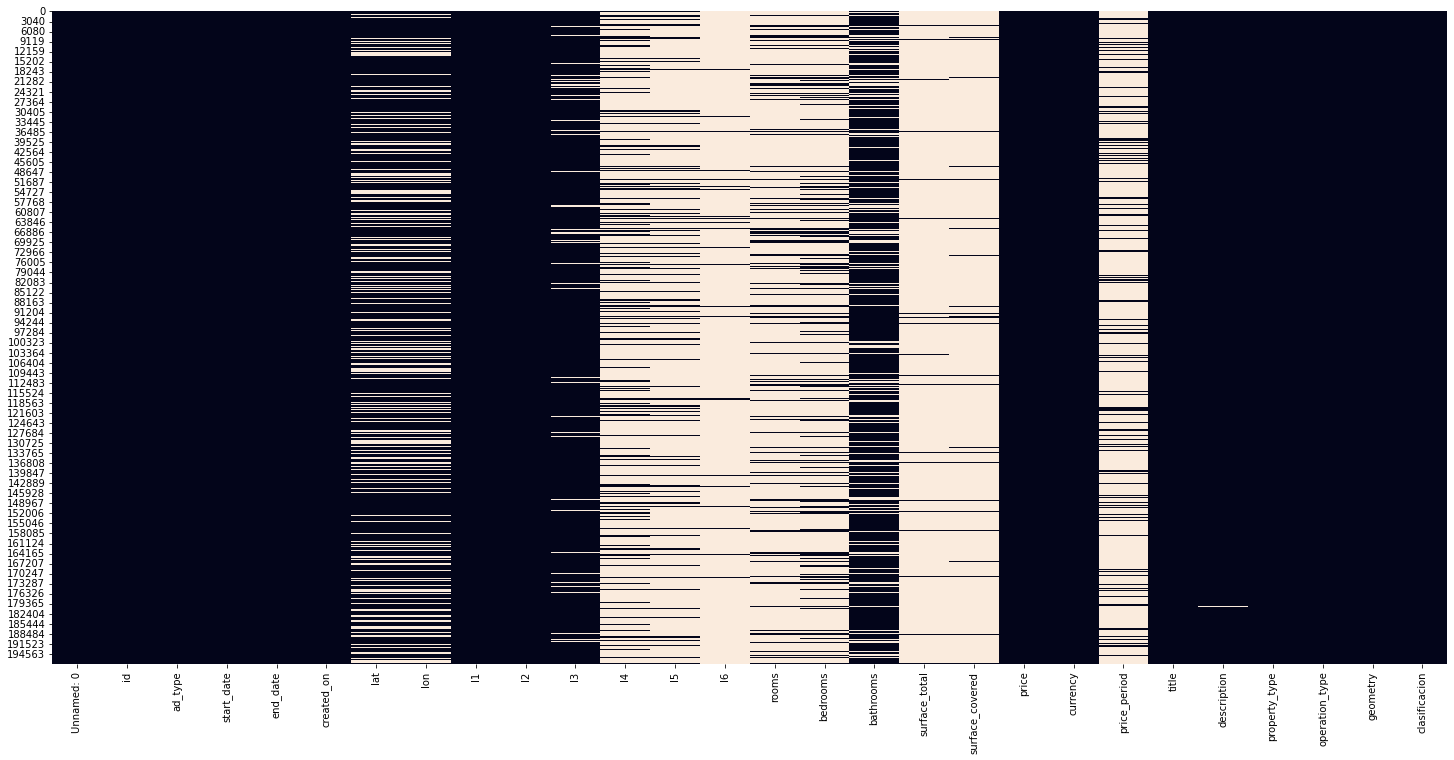

In [171]:
plt.figure(figsize= (25,12))
sns.heatmap(colombiaTrain.isnull(), cbar=False)
plt.show()

C:\Users\Nueva era\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clasificacion', ylabel='Density'>

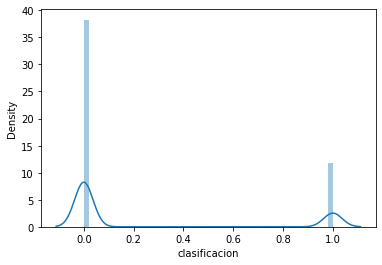

In [179]:
#Se eliminan las columnas price_period, surface_covered, surface_total, bedrooms, rooms, l4,l5, l6, lat y long por falta de datos

In [ ]:
#Se elimina la columna 

<AxesSubplot:>

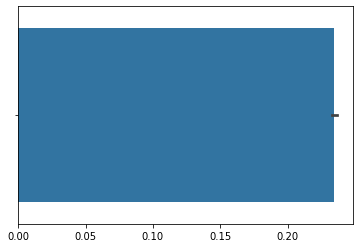

In [210]:
sns.barplot(x=[colombiaTrain.clasificacion])

In [273]:
colombiaTrain2.head()

1       lat        lon            l2           l3  bathrooms  \
0  12  6.203000 -75.572000     Antioquia     Medellín        4.0   
1  09  4.722748 -74.073115  Cundinamarca   Bogotá D.C        2.0   
2  08  4.709000 -74.030000  Cundinamarca   Bogotá D.C        2.0   
3  11  5.666153 -75.041187     Santander  Bucaramanga        1.0   
4  10  5.666153 -75.041187     Antioquia     Medellín        2.0   

  property_type  clasificacion  
0          Casa              1  
1   Apartamento              0  
2          Casa              0  
3          Otro              1  
4   Apartamento              0

In [275]:
colombiaTrain2 = colombiaTrain2.drop([0,2,'Unnamed: 0', 'id', 'ad_type','start_date', 'end_date', 'created_on','l1','l4','l5','l6',
'rooms','bedrooms','surface_total','surface_covered','price','currency','price_period','title','description','operation_type','geometry'], axis = 1)

In [276]:
colombiaTrain2.bathrooms = np.where(colombiaTrain2.bathrooms.isnull()==True, 0, colombiaTrain2.bathrooms)

In [266]:
colombiaTrain2.lat.mean()

5.66615340720424

In [283]:
colombiaTrain2.lon.mean()

-75.17420066528875

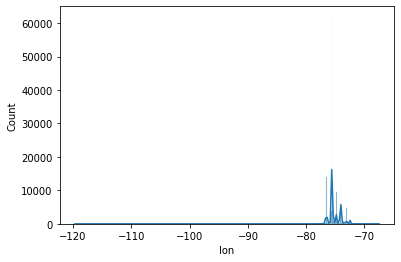

In [281]:
sns.histplot(x = 'lon', data= colombiaTrain2, kde = True)
plt.show()

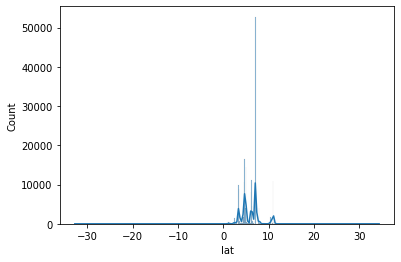

In [280]:
sns.histplot(x = 'lat', data= colombiaTrain2, kde = True)
plt.show()

In [250]:
colombiaTrain2[['lat','lon']]

lat        lon
0        6.203000 -75.572000
1        4.722748 -74.073115
2        4.709000 -74.030000
3             NaN        NaN
4             NaN        NaN
...           ...        ...
197477   4.649682 -74.161950
197478   4.668000 -74.055000
197479   3.413000 -76.541000
197480   4.674874 -74.147077
197481  10.935994 -74.802899

[197482 rows x 2 columns]

In [279]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(colombiaTrain2[['lat']])
colombiaTrain2['lat'] = imputer.transform(colombiaTrain2[['lat']])
imputer.fit(colombiaTrain2[['lon']])
colombiaTrain2['lon'] = imputer.transform(colombiaTrain2[['lon']])

In [282]:
colombiaTrain2.lat.mean()

6.030214772245566

In [284]:
colombiaTrain2.reset_index(drop = True, inplace = True)

In [285]:
colombiaTrain2

1        lat        lon               l2            l3  bathrooms  \
0       12   6.203000 -75.572000        Antioquia      Medellín        4.0   
1       09   4.722748 -74.073115     Cundinamarca    Bogotá D.C        2.0   
2       08   4.709000 -74.030000     Cundinamarca    Bogotá D.C        2.0   
3       11   7.119000 -75.572000        Santander   Bucaramanga        1.0   
4       10   7.119000 -75.572000        Antioquia      Medellín        2.0   
...     ..        ...        ...              ...           ...        ...   
197477  10   4.649682 -74.161950     Cundinamarca    Bogotá D.C        0.0   
197478  11   4.668000 -74.055000     Cundinamarca    Bogotá D.C        1.0   
197479  10   3.413000 -76.541000  Valle del Cauca          Cali        1.0   
197480  08   4.674874 -74.147077     Cundinamarca    Bogotá D.C        2.0   
197481  10  10.935994 -74.802899        Atlántico  Barranquilla        1.0   

       property_type  clasificacion  
0               Casa              1  
1        Apartamento              0  
2               Casa              0  
3               Otro              1  
4        Apartamento              0  
...              ...            ...  
197477   Apartamento              0  
197478       Oficina              0  
197479          Otro              0  
197480          Casa              0  
197481   Apartamento              0  

[197482 rows x 8 columns]

In [286]:
colombiaTrain2 = pd.get_dummies(colombiaTrain2, columns=['l2','l3','property_type'])



In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  

colombi['Street'] = label_encoder.fit_transform(data['Street'])

In [301]:
correlacionOH=colombiaTrain2.corr()

In [306]:
correlacion_positiva=correlacionOH[correlacionOH.clasificacion>0.1]
correlacion_positiva

lat       lon  bathrooms  clasificacion  l2_Amazonas  \
bathrooms          -0.002565 -0.003004   1.000000       0.268136    -0.003863   
clasificacion      -0.033697  0.045649   0.268136       1.000000    -0.005574   
l2_Cundinamarca    -0.285084  0.478333   0.011005       0.147782    -0.004977   
l3_Bogotá D.C      -0.238992  0.406561   0.018558       0.129707    -0.004150   
property_type_Lote -0.015045 -0.005997  -0.377016       0.109683     0.004235   
property_type_Otro -0.047931 -0.016786   0.042068       0.191502    -0.003041   

                    l2_Antioquia  l2_Arauca  l2_Atlántico  l2_Bolívar  \
bathrooms              -0.017363   0.001630      0.001118   -0.023762   
clasificacion          -0.009956   0.007072     -0.019008    0.017760   
l2_Cundinamarca        -0.329186  -0.003691     -0.145954   -0.058946   
l3_Bogotá D.C          -0.274479  -0.003078     -0.121698   -0.049150   
property_type_Lote      0.010316   0.002650     -0.023927   -0.002821   
property_type_Otro     -0.032218   0.009996     -0.030175   -0.022325   

                    l2_Boyacá  ...  l3_Zipacón  l3_Zipaquirá  \
bathrooms           -0.023351  ...   -0.004884     -0.015530   
clasificacion       -0.002776  ...    0.007037     -0.013365   
l2_Cundinamarca     -0.023211  ...    0.007881      0.097059   
l3_Bogotá D.C       -0.019353  ...   -0.001607     -0.019795   
property_type_Lote   0.044445  ...    0.012908     -0.002650   
property_type_Otro   0.017839  ...   -0.001178     -0.007252   

                    property_type_Apartamento  property_type_Casa  \
bathrooms                           -0.061076            0.300531   
clasificacion                       -0.257321            0.074230   
l2_Cundinamarca                     -0.022733            0.026084   
l3_Bogotá D.C                        0.047373           -0.014811   
property_type_Lote                  -0.307359           -0.200640   
property_type_Otro                  -0.307613           -0.200806   

                    property_type_Finca  property_type_Local comercial  \
bathrooms                     -0.069872                      -0.072446   
clasificacion                  0.075935                       0.042012   
l2_Cundinamarca               -0.008043                       0.033226   
l3_Bogotá D.C                 -0.027140                       0.028969   
property_type_Lote            -0.022937                      -0.024119   
property_type_Otro            -0.022956                      -0.024139   

                    property_type_Lote  property_type_Oficina  \
bathrooms                    -0.377016              -0.057322   
clasificacion                 0.109683               0.026483   
l2_Cundinamarca              -0.025647               0.074947   
l3_Bogotá D.C                -0.078413               0.089622   
property_type_Lote            1.000000              -0.022391   
property_type_Otro           -0.091251              -0.022410   

                    property_type_Otro  property_type_Parqueadero  
bathrooms                     0.042068                  -0.008918  
clasificacion                 0.191502                   0.002775  
l2_Cundinamarca              -0.003996                  -0.001729  
l3_Bogotá D.C                -0.007258                  -0.000915  
property_type_Lote           -0.091251                  -0.002149  
property_type_Otro            1.000000                  -0.002151  

[6 rows x 336 columns]

In [305]:
correlacion_negativa = correlacionOH[correlacionOH.clasificacion<-0.1]
correlacion_negativa

lat       lon  bathrooms  clasificacion  \
property_type_Apartamento  0.097625 -0.032963  -0.061076      -0.257321   

                           l2_Amazonas  l2_Antioquia  l2_Arauca  l2_Atlántico  \
property_type_Apartamento     0.000828       0.20143  -0.007597     -0.023054   

                           l2_Bolívar  l2_Boyacá  ...  l3_Zipacón  \
property_type_Apartamento    0.039861  -0.028953  ...   -0.003967   

                           l3_Zipaquirá  property_type_Apartamento  \
property_type_Apartamento      0.018606                        1.0   

                           property_type_Casa  property_type_Finca  \
property_type_Apartamento           -0.676372            -0.077323   

                           property_type_Local comercial  property_type_Lote  \
property_type_Apartamento                      -0.081307           -0.307359   

                           property_type_Oficina  property_type_Otro  \
property_type_Apartamento              -0.075482           -0.307613   

                           property_type_Parqueadero  
property_type_Apartamento                  -0.007244  

[1 rows x 336 columns]

In [313]:
XOH = pd.concat([colombiaTrain2.bathrooms,colombiaTrain2.l2_Cundinamarca,colombiaTrain2['l3_Bogotá D.C'],colombiaTrain2['property_type_Lote'],colombiaTrain2['property_type_Otro'],colombiaTrain2['property_type_Apartamento']],axis=1)

In [314]:
XOH

bathrooms  l2_Cundinamarca  l3_Bogotá D.C  property_type_Lote  \
0             4.0                0              0                   0   
1             2.0                1              1                   0   
2             2.0                1              1                   0   
3             1.0                0              0                   0   
4             2.0                0              0                   0   
...           ...              ...            ...                 ...   
197477        0.0                1              1                   0   
197478        1.0                1              1                   0   
197479        1.0                0              0                   0   
197480        2.0                1              1                   0   
197481        1.0                0              0                   0   

        property_type_Otro  property_type_Apartamento  
0                        0                          0  
1                        0                          1  
2                        0                          0  
3                        1                          0  
4                        0                          1  
...                    ...                        ...  
197477                   0                          1  
197478                   0                          0  
197479                   1                          0  
197480                   0                          0  
197481                   0                          1  

[197482 rows x 6 columns]

In [288]:
X = colombiaTrain2.drop(['clasificacion'], axis = 1)

In [237]:
(X.isnull()==True).value_counts()

1      lat    lon    bathrooms  l2_Amazonas  l2_Antioquia  l2_Arauca  l2_Atlántico  l2_Bolívar  l2_Boyacá  l2_Caldas  l2_Caquetá  l2_Casanare  l2_Cauca  l2_Cesar  l2_Chocó  l2_Cundinamarca  l2_Córdoba  l2_Guainía  l2_Guaviare  l2_Huila  l2_La Guajira  l2_Magdalena  l2_Meta  l2_Nariño  l2_Norte de Santander  l2_Putumayo  l2_Quindío  l2_Risaralda  l2_San Andrés Providencia y Santa Catalina  l2_Santander  l2_Sucre  l2_Tolima  l2_Valle del Cauca  l2_Vichada  l3_Abejorral  l3_Acacías  l3_Acandí  l3_Agua de Dios  l3_Aguazul  l3_Aipe  l3_Albania  l3_Albán  l3_Alvarado  l3_Anapoima  l3_Andalucía  l3_Anolaima  l3_Anserma  l3_Apulo  l3_Arauca  l3_Arbeláez  l3_Arcabuco  l3_Arjona  l3_Armenia  l3_Balboa  l3_Baranoa  l3_Barbosa  l3_Barichara  l3_Barrancabermeja  l3_Barranquilla  l3_Bello  l3_Bochalema  l3_Bogotá D.C  l3_Bojacá  l3_Bucaramanga  l3_Buenaventura  l3_Buesaco  l3_Cabrera  l3_Cachipay  l3_Caicedonia  l3_Cajicá  l3_Calarca  l3_Caldas  l3_Cali  l3_Calima  l3_Candelaria  l3_Caparrapí  l3_Ca

In [289]:
from sklearn import preprocessing

In [290]:
from sklearn.preprocessing import StandardScaler

In [291]:
scaler = preprocessing.StandardScaler()
robust_df = scaler.fit_transform(X)


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [319]:
y = colombiaTrain2.clasificacion

In [320]:
y

0         1
1         0
2         0
3         1
4         0
         ..
197477    0
197478    0
197479    0
197480    0
197481    0
Name: clasificacion, Length: 197482, dtype: int32

In [321]:
y.shape

(197482,)

In [322]:
#Separar entre valores de entrenamiento y valores de
from sklearn.model_selection import train_test_split


XOH_train, XOH_test, y_train, y_test = train_test_split(XOH, y, test_size=0.20, random_state=42)

print(XOH_train.shape, y_train.shape, XOH_test.shape, y_test.shape)

(157985, 6) (157985,) (39497, 6) (39497,)


In [343]:
#Entrenamos
scXOH_train = scaler.fit_transform(XOH_train)
scXOH_test = scaler.fit_transform(XOH_test)

In [344]:
#Aplicamos regresión logística

from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(scXOH_train,y_train)

LogisticRegression()

In [345]:
y_train_pred = logReg.predict(scXOH_train) # subset de entrenamiento
y_test_pred = logReg.predict(scXOH_test) #subset de testeo

In [346]:
from sklearn.metrics import accuracy_score 
print('El score del modelo es:', accuracy_score(y_test, y_test_pred))

El score del modelo es: 0.7945666759500721


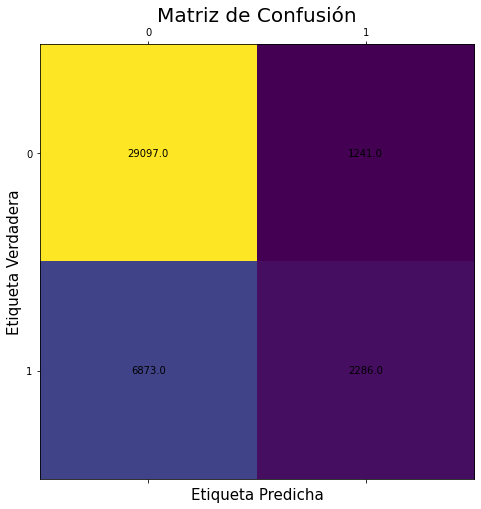

In [347]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [361]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     30338
           1       0.65      0.25      0.36      9159

    accuracy                           0.79     39497
   macro avg       0.73      0.60      0.62     39497
weighted avg       0.77      0.79      0.76     39497



In [333]:
from sklearn.metrics import accuracy_score 
print('El score del modelo es:', accuracy_score(y_test, y_test_pred))

El score del modelo es: 0.7945666759500721


In [335]:
from sklearn.neighbors import KNeighborsClassifier # Modelo 1
from sklearn.svm import SVC # Modelo 2
from sklearn.tree import DecisionTreeClassifier # Modelo 3

from sklearn.ensemble import StackingClassifier

In [349]:
# Creamos la grilla de hiperparámetros para el modelo de vecinos más cercanos

param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'algorithm':['auto', 'kd_tree']}

In [395]:
vecino = KNeighborsClassifier(n_neighbors=100, leaf_size= 300)

In [396]:
vecino.fit(scXOH_train, y_train)

KNeighborsClassifier(leaf_size=300, n_neighbors=100)

In [397]:
y_train_predk = vecino.predict(scXOH_train) # subset de entrenamiento
y_test_predk =vecino.predict(scXOH_test) #subset de testeo

In [383]:
print('El score del modelo es:', accuracy_score(y_train, y_train_predk))

El score del modelo es: 0.8195904674494414


In [398]:
print(classification_report(y_test, y_test_predk))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     30338
           1       0.64      0.51      0.57      9159

    accuracy                           0.82     39497
   macro avg       0.75      0.71      0.73     39497
weighted avg       0.81      0.82      0.81     39497



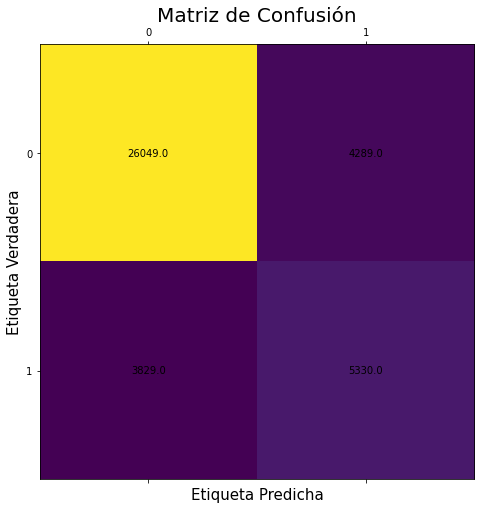

In [394]:
cm = confusion_matrix(y_test, y_test_predk)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [419]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

In [423]:
tree.fit(scXOH_train, y_train)

DecisionTreeClassifier(random_state=42)

In [426]:
# Predecimos sobre nuestro set de entrenamiento

y_train_predtree = tree.predict(scXOH_train)

# Predecimos sobre nuestro set de test

y_test_predtree = tree.predict(scXOH_test)

# Comparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train,y_train_predtree))
print('Accuracy sobre conjunto de Test:', classification_report(y_test,y_test_predtree))



Accuracy sobre conjunto de Train: 0.8209386967117132
Accuracy sobre conjunto de Test:               precision    recall  f1-score   support

           0       0.85      0.93      0.89     30338
           1       0.66      0.47      0.55      9159

    accuracy                           0.82     39497
   macro avg       0.76      0.70      0.72     39497
weighted avg       0.81      0.82      0.81     39497



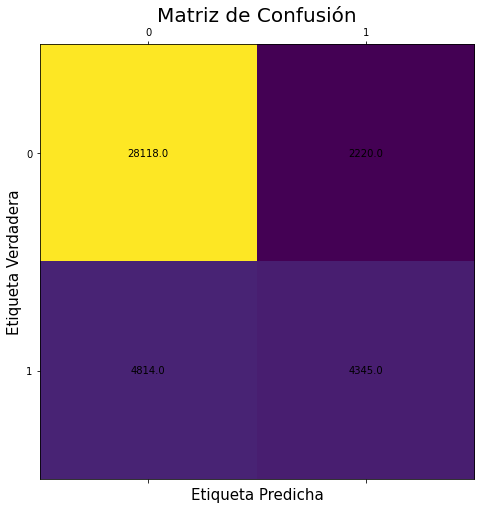

In [425]:
cm = confusion_matrix(y_test, y_test_predtree)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [350]:
'''knn = KNeighborsClassifier()
# Probamos la estrategia grid search

from sklearn.model_selection import GridSearchCV

# Le pasamos la grilla que creamos
model = GridSearchCV(knn, param_grid=param_grid, cv=5)'''

In [352]:
print('hola mundo')

hola mundo


In [427]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=10, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
rfclf.fit(scXOH_train,y_train)

c:\Program Files\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=42)

In [428]:
y_train_predrfclf = rfclf.predict(scXOH_train)
y_test_predrfclf = rfclf.predict(scXOH_test)
print(accuracy_score(y_train, y_train_predrfclf))
print(classification_report(y_test, y_test_predrfclf))

0.8209323669968668
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     30338
           1       0.67      0.47      0.55      9159

    accuracy                           0.82     39497
   macro avg       0.76      0.70      0.72     39497
weighted avg       0.81      0.82      0.81     39497



In [429]:
colombiaTrain2

1        lat        lon  bathrooms  clasificacion  l2_Amazonas  \
0       12   6.203000 -75.572000        4.0              1            0   
1       09   4.722748 -74.073115        2.0              0            0   
2       08   4.709000 -74.030000        2.0              0            0   
3       11   7.119000 -75.572000        1.0              1            0   
4       10   7.119000 -75.572000        2.0              0            0   
...     ..        ...        ...        ...            ...          ...   
197477  10   4.649682 -74.161950        0.0              0            0   
197478  11   4.668000 -74.055000        1.0              0            0   
197479  10   3.413000 -76.541000        1.0              0            0   
197480  08   4.674874 -74.147077        2.0              0            0   
197481  10  10.935994 -74.802899        1.0              0            0   

        l2_Antioquia  l2_Arauca  l2_Atlántico  l2_Bolívar  ...  l3_Zipacón  \
0                  1          0             0           0  ...           0   
1                  0          0             0           0  ...           0   
2                  0          0             0           0  ...           0   
3                  0          0             0           0  ...           0   
4                  1          0             0           0  ...           0   
...              ...        ...           ...         ...  ...         ...   
197477             0          0             0           0  ...           0   
197478             0          0             0           0  ...           0   
197479             0          0             0           0  ...           0   
197480             0          0             0           0  ...           0   
197481             0          0             1           0  ...           0   

        l3_Zipaquirá  property_type_Apartamento  property_type_Casa  \
0                  0                          0                   1   
1                  0                          1                   0   
2                  0                          0                   1   
3                  0                          0                   0   
4                  0                          1                   0   
...              ...                        ...                 ...   
197477             0                          1                   0   
197478             0                          0                   0   
197479             0                          0                   0   
197480             0                          0                   1   
197481             0                          1                   0   

        property_type_Finca  property_type_Local comercial  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
...                     ...                            ...   
197477                    0                              0   
197478                    0                              0   
197479                    0                              0   
197480                    0                              0   
197481                    0                              0   

        property_type_Lote  property_type_Oficina  property_type_Otro  \
0                        0                      0                   0   
1                        0                      0                   0   
2                        0                      0                   0   
3                        0                      0                   1   
4                        0                      0                   0   
...                    ...                    ...                 ...   
197477                   0                      0             

In [430]:
df_pca = colombiaTrain2.drop(['clasificacion'], axis=1)
df_pca

1        lat        lon  bathrooms  l2_Amazonas  l2_Antioquia  \
0       12   6.203000 -75.572000        4.0            0             1   
1       09   4.722748 -74.073115        2.0            0             0   
2       08   4.709000 -74.030000        2.0            0             0   
3       11   7.119000 -75.572000        1.0            0             0   
4       10   7.119000 -75.572000        2.0            0             1   
...     ..        ...        ...        ...          ...           ...   
197477  10   4.649682 -74.161950        0.0            0             0   
197478  11   4.668000 -74.055000        1.0            0             0   
197479  10   3.413000 -76.541000        1.0            0             0   
197480  08   4.674874 -74.147077        2.0            0             0   
197481  10  10.935994 -74.802899        1.0            0             0   

        l2_Arauca  l2_Atlántico  l2_Bolívar  l2_Boyacá  ...  l3_Zipacón  \
0               0             0           0          0  ...           0   
1               0             0           0          0  ...           0   
2               0             0           0          0  ...           0   
3               0             0           0          0  ...           0   
4               0             0           0          0  ...           0   
...           ...           ...         ...        ...  ...         ...   
197477          0             0           0          0  ...           0   
197478          0             0           0          0  ...           0   
197479          0             0           0          0  ...           0   
197480          0             0           0          0  ...           0   
197481          0             1           0          0  ...           0   

        l3_Zipaquirá  property_type_Apartamento  property_type_Casa  \
0                  0                          0                   1   
1                  0                          1                   0   
2                  0                          0                   1   
3                  0                          0                   0   
4                  0                          1                   0   
...              ...                        ...                 ...   
197477             0                          1                   0   
197478             0                          0                   0   
197479             0                          0                   0   
197480             0                          0                   1   
197481             0                          1                   0   

        property_type_Finca  property_type_Local comercial  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
...                     ...                            ...   
197477                    0                              0   
197478                    0                              0   
197479                    0                              0   
197480                    0                              0   
197481                    0                              0   

        property_type_Lote  property_type_Oficina  property_type_Otro  \
0                        0                      0                   0   
1                        0                      0                   0   
2                        0                      0                   0   
3                        0                      0                   1   
4                        0                      0                   0   
...                    ...                    ...                 ...   
197477                   0                      0                   0   
197478                   0           

In [433]:
from sklearn.decomposition import PCA
sc_df_pca = scaler.fit_transform(df_pca)
pca = PCA(n_components = 0.88)
pca.fit(sc_df_pca)
reduced = pca.transform(sc_df_pca)

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [434]:
reduced

array([[ 1.66969786e-01,  1.37761270e+00, -5.79222088e-01, ...,
        -1.08653116e-04, -7.16938421e-05,  5.10361558e-05],
       [-7.38853984e-01, -2.18245348e+00, -1.91474672e+00, ...,
         1.63448766e-04, -4.00389605e-05,  1.48537002e-05],
       [-5.86807498e-01, -2.99602610e+00, -8.03651441e-01, ...,
         9.27525002e-05,  6.75713225e-05,  2.27144426e-05],
       ...,
       [ 3.59983622e+00, -4.18431410e-01,  1.34194705e+00, ...,
        -3.59069890e-04,  9.04622532e-05, -1.64446720e-04],
       [-5.29775853e-01, -2.96424242e+00, -7.93561346e-01, ...,
         9.27661850e-05,  6.79427503e-05,  2.31151701e-05],
       [-3.16224786e+00,  1.82531350e+00,  2.97603563e+00, ...,
         2.57537754e-04, -3.29533133e-04,  1.93160025e-04]])

In [435]:
pca.n_components_

267

In [ ]:
vecino_pca = KNeighborsClassifier(n_neighbors=100, leaf_size= 300)

In [ ]:
vecino_pca.fit(scXOH_train, y_train)

In [ ]:
y_train_predk = vecino.predict(scXOH_train) # subset de entrenamiento
y_test_predk =vecino.predict(scXOH_test) #subset de testeo